<a href="https://colab.research.google.com/github/ikram-data/Violet-WD-Hackathon/blob/GL/Constructing_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.tools 
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('max_colwidth',99999)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA 

In [4]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

     |████████████████████████████████| 41 kB 249 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=f2df98ce9800896e03c3b0aacb6d8b8f79fa614d28fa56ffceb70e8c65ea653b
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [5]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


# create complete df

In [6]:
df=pd.read_csv('complete_df.csv')

In [14]:
gdp_g=pd.read_csv('gdp_growth.csv')
gdp_pc_g=pd.read_csv('gdp_pc_growth.csv')
access=pd.read_csv('equal_access.csv')
primary=pd.read_csv('primary_completion.csv')

In [48]:
enrol=pd.read_csv('enrol.csv')
persist=pd.read_csv('persist.csv')

In [9]:
def melt_func(df,val_name):
  melted_df = pd.melt(df, id_vars = ["Country Name"], value_vars = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']
       ,var_name= "year", value_name=val_name)
  melted_df.year=melted_df.year.astype(float)
  melted_df.rename(columns={'year':'Year'},inplace=True)
  return melted_df

In [15]:
gdp_g=melt_func(gdp_g,'gdp_g')
gdp_pc_g=melt_func(gdp_pc_g,'gdp_pc_g')
primary=melt_func(primary,'primary')

In [49]:
enrol=melt_func(enrol,'enrol')
persist=melt_func(persist,'persist')

In [17]:
access.rename(columns={'country_name':'Country Name','year':'Year'},inplace=True)

In [181]:
from functools import reduce
data_frames=[df,gdp_g,gdp_pc_g,primary,access]
new_df = reduce(lambda  left,right: pd.merge(left,right,on=['Country Name','Year'],
                                            how='left'), data_frames)

In [182]:
new_df=new_df[[ 'Country Name', 'Country Code', 'Continent', 'Year',
       'gdp_g', 'gdp_pc_g',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'pol_gen', 'exl_gen', 
       'exl_eco', 'exl_geo',
       'exl_pol', 'exl_soc', 'labour_share',
       'Income Classification (World Bank Definition)', 'suffrage_f', 
       'domestic_movement', 'slave', 'suffrage', 'si02', 'si03',
       'si05', 'si07', 'tariff', 'ODA', 
       'primary', 'v2xeg_eqaccess']]

In [188]:
new_df.describe()

,Year,gdp_g,gdp_pc_g,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,suffrage_f,domestic_movement,slave,suffrage,si02,si03,si05,si07,tariff,ODA,primary,v2xeg_eqaccess
count,4431.000000,4157.000000,4157.000000,3211.000000,3043.000000,3057.000000,3078.000000,3078.000000,3078.000000,3069.000000,3074.000000,3083.000000,3078.000000,3244.000000,3244.000000,3244.000000,2196.000000,2123.000000,2220.000000,2014.000000,1213.000000,8.400000e+02,2658.000000,3244.000000
mean,2010.000000,0.033304,0.019024,0.694959,0.181048,0.742343,0.678615,0.623072,0.637795,0.637716,0.640940,0.822396,0.933586,0.741400,0.706829,0.935658,6.900210,10.098969,17.049122,71.863631,59.706670,2.198718e+09,0.891630,0.631524
std,6.055984,0.056895,0.055669,0.181570,0.112138,0.172575,0.229756,0.257043,0.256306,0.273492,0.255649,0.108601,0.243139,0.211491,0.196540,0.240440,7.357033,3.991589,5.339120,43.407062,16.241431,5.347558e+09,0.186939,0.226231
min,2000.000000,-0.620759,-0.623780,0.237500,0.000000,0.105000,0.036000,0.042000,0.052000,0.046000,0.066000,0.102473,0.000000,0.006000,0.020000,0.000000,0.000000,1.490000,1.750000,0.800000,0.000000,-9.363000e+09,0.165752,0.069000
25%,2005.000000,0.012609,-0.000438,0.587500,0.098440,0.638000,0.509500,0.429000,0.470000,0.419000,0.460000,0.784498,1.000000,0.657500,0.634000,1.000000,2.130000,7.223440,13.500000,45.282500,49.233410,1.625000e+08,0.831514,0.468000
50%,2010.000000,0.035098,0.020744,0.718750,0.163333,0.786000,0.695000,0.630000,0.667000,0.671000,0.677000,0.829641,1.000000,0.821500,0.747500,1.000000,4.125000,9.520000,16.100000,61.500000,60.774940,7.010000e+08,0.956388,0.676000
75%,2015.000000,0.058577,0.042896,0.825000,0.250000,0.878000,0.900000,0.852000,0.889000,0.901000,0.864500,0.873818,1.000000,0.895000,0.855000,1.000000,9.320000,12.245000,18.977500,83.775000,71.940060,1.864500e+09,1.004628,0.814250
max,2020.000000,1.231396,1.217795,1.000000,0.637500,0.969000,0.987000,0.991000,0.969000,0.992000,0.989000,1.858574,1.000000,0.958000,0.975000,1.000000,74.100000,30.600000,48.600000,604.070000,95.653260,5.016900e+10,1.345425,0.976000


In [122]:
full_new.columns

Index(['Country Name', 'Country Code', 'Continent', 'Year', 'gdp_g',
       'gdp_pc_g',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'pol_gen', 'exl_gen', 'exl_eco', 'exl_geo', 'exl_pol', 'exl_soc',
       'labour_share', 'suffrage_f', 'domestic_movement', 'slave', 'suffrage',
       'v2xeg_eqaccess'],
      dtype='object')

In [184]:
new_df.gdp_g=new_df.gdp_g.apply(lambda x: x/100)
new_df.gdp_pc_g=new_df.gdp_pc_g.apply(lambda x: x/100)
new_df['Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX']=new_df['Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX'].apply(lambda x: x/100)
new_df['Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS']=new_df['Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS'].apply(lambda x: x/100)
new_df['suffrage_f']=new_df['suffrage_f'].apply(lambda x: x/100)
new_df['suffrage']=new_df['suffrage'].apply(lambda x: x/100)
new_df['primary']=new_df['primary'].apply(lambda x: x/100)
new_df['suffrage']=new_df['suffrage'].apply(lambda x: x/100)

In [187]:
new_df['suffrage']=new_df['suffrage'].apply(lambda x: x*100)

In [185]:
new_df['exl_gen']= 1-new_df['exl_gen']
new_df['exl_eco']=1-new_df['exl_eco']
new_df['exl_geo']= 1-new_df['exl_geo']
new_df['exl_pol']= 1-new_df['exl_pol']
new_df['exl_soc']= 1-new_df['exl_soc']

In [ ]:
continent=pd.read_csv('continent.csv')

In [ ]:
continent.columns

Index(['Unnamed: 0', 'Country Name_x', 'Country Code', 'Continent'], dtype='object')

In [ ]:
df=df.merge(continent, on='Country Code',how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5607 entries, 0 to 5606
Data columns (total 45 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Unnamed: 0_x                                                                    5607 non-null   int64  
 1   Country Name                                                                    5607 non-null   object 
 2   Country Code                                                                    4431 non-null   object 
 3   Year                                                                            5607 non-null   int64  
 4   GDP (current US$) - NY.GDP.MKTP.CD                                              3265 non-null   float64
 5   GDP per capita (current US$) - NY.GDP.PCAP.CD                                   3265 non-null   float64
 6   Women Business a

In [ ]:
df.dropna(subset=['Country Code'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4431 entries, 0 to 5606
Data columns (total 45 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Unnamed: 0_x                                                                    4431 non-null   int64  
 1   Country Name                                                                    4431 non-null   object 
 2   Country Code                                                                    4431 non-null   object 
 3   Year                                                                            4431 non-null   int64  
 4   GDP (current US$) - NY.GDP.MKTP.CD                                              3246 non-null   float64
 5   GDP per capita (current US$) - NY.GDP.PCAP.CD                                   3246 non-null   float64
 6   Women Business a

In [ ]:
df=df[['Country Name', 'Country Code', 'Continent' ,'Year',
       'GDP (current US$) - NY.GDP.MKTP.CD',
       'GDP per capita (current US$) - NY.GDP.PCAP.CD',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'pol_gen', 'exl_gen', 'cddrst_soc', 'hogrst_soc', 'hosrst_soc',
       'just_pbadm', 'free_acexp', 'free_rel', 'pow_sxo', 'exl_eco', 'exl_geo',
       'exl_pol', 'exl_soc', 'labour_share',
       'Income Classification (World Bank Definition)', 'power_soec',
       'power_f', 'suffrage_f', 'dmr_f',
       'Compulsory education, duration (years) - SE.COM.DURS',
       'School enrollment, secondary (% gross) - SE.SEC.ENRR',
       'domestic_movement', 'slave', 'suffrage', 'minwage', 'si02', 'si03',
       'si05', 'si07','fiscal', 'tariff', 'ODA',
       'No. of Refugees (No of Accepted Applications)']]

In [ ]:
df.describe()

,Year,GDP (current US$) - NY.GDP.MKTP.CD,GDP per capita (current US$) - NY.GDP.PCAP.CD,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,cddrst_soc,hogrst_soc,hosrst_soc,just_pbadm,free_acexp,free_rel,pow_sxo,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,power_soec,power_f,suffrage_f,dmr_f,"Compulsory education, duration (years) - SE.COM.DURS","School enrollment, secondary (% gross) - SE.SEC.ENRR",domestic_movement,slave,suffrage,minwage,si02,si03,si05,si07,fiscal,tariff,ODA,No. of Refugees (No of Accepted Applications)
count,4431.000000,3.246000e+03,3246.000000,3211.000000,3043.000000,3057.000000,3078.000000,3078.000000,1989.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3069.000000,3074.000000,3083.000000,3078.000000,3078.000000,3078.000000,3078.000000,2960.000000,2440.000000,3244.000000,3244.000000,3244.000000,928.000000,2196.000000,2123.000000,2220.000000,2014.000000,1200.000000,1213.000000,8.400000e+02,2849.000000
mean,2010.000000,3.506734e+11,12303.000762,69.495874,18.104825,0.742343,0.321385,0.856725,0.953243,0.861598,0.527337,1.153517,1.164722,0.218409,0.376928,0.362205,0.362284,0.359060,0.822396,0.526917,1.057146,93.358634,1.173749,9.303378,81.071915,0.741400,0.706829,93.565848,1.866379,6.900210,10.098969,17.049122,71.863631,3.275417,59.706670,2.198718e+09,1742.101790
std,6.055984,1.406351e+12,17828.197579,18.156980,11.213816,0.172575,0.229756,0.350410,0.211171,0.345377,1.426048,1.441867,1.254104,1.321823,0.257043,0.256306,0.273492,0.255649,0.108601,0.957454,0.976385,24.313854,1.074492,2.222163,28.975471,0.211491,0.196540,24.044025,0.930967,7.357033,3.991589,5.339120,43.407062,0.694747,16.241431,5.347558e+09,7816.869711
min,2000.000000,1.811170e+08,90.532429,23.750000,0.000000,0.105000,0.013000,0.000000,0.000000,0.000000,-2.608000,-3.030000,-3.240000,-2.222000,0.009000,0.031000,0.008000,0.011000,0.102473,-2.780000,-2.563000,0.000000,-3.055000,4.000000,6.197350,0.006000,0.020000,0.000000,0.000000,0.000000,1.490000,1.750000,0.800000,1.000000,0.000000,-9.363000e+09,0.000000
25%,2005.000000,6.267705e+09,1266.586065,58.750000,9.843980,0.638000,0.100000,1.000000,1.000000,1.000000,-0.557750,0.259000,0.528500,-0.806000,0.148000,0.111000,0.099000,0.135500,0.784498,0.002000,0.523250,100.000000,0.544000,8.000000,64.382074,0.657500,0.634000,100.000000,1.000000,2.130000,7.223440,13.500000,45.282500,3.000000,49.233410,1.625000e+08,10.000000
50%,2010.000000,2.459415e+10,4335.709007,71.875000,16.333333,0.786000,0.305000,1.000000,1.000000,1.000000,0.335000,1.335000,1.552000,0.335000,0.370000,0.333000,0.329000,0.323000,0.829641,0.689000,1.114000,100.000000,1.447500,9.000000,88.337177,0.821500,0.747500,100.000000,2.000000,4.125000,9.520000,16.100000,61.500000,3.500000,60.774940,7.010000e+08,72.000000
75%,2015.000000,1.760442e+11,15354.662562,82.500000,25.000000,0.878000,0.490500,1.000000,1.000000,1.000000,1.470250,2.250000,2.063000,1.196000,0.571000,0.530000,0.581000,0.540000,0.873818,1.213000,1.624000,100.000000,2.035000,10.000000,100.117315,0.895000,0.855000,100.000000,3.000000,9.320000,12.245000,18.977500,83.775000,3.500000,71.940060,1.864500e+09,510.000000
max,2020.000000,2.061190e+13,118823.648400,100.000000,63.750000,0.969000,0.964000,1.000000,1.000000,1.000000,4.006000,3.633000,3.055000,3.225000,0.958000,0.948000,0.954000,0.934000,1.858574,3.066000,3.668000,100.000000,2.714000,17.000000,163.934723,0.958000,0.975000,100.000000,3.000000,74.100000,30.600000,48.600000,604.070000,5.000000,95.653260,5.016900e+10,263571.000000


In [32]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df.to_csv('complete_df.csv')
!cp complete_df.csv "drive/My Drive/"

In [189]:
new_df.to_csv('index_df.csv')
!cp index_df.csv "drive/My Drive/"

In [346]:
final_index.to_csv('final_index3.csv')
!cp final_index3.csv "drive/My Drive/"

In [ ]:
df.shape

(4431, 41)

In [ ]:
df.dropna(axis = 0, how = 'any').shape

(0, 41)

In [ ]:
df[df.Year<2020].dropna(axis = 0, how = 'any').shape

(0, 41)

In [ ]:
36613/(4431* 30)

0.275430677800346

In [ ]:
check=df[['Country Name', 'Country Code','Continent', 'Year',
       'GDP (current US$) - NY.GDP.MKTP.CD',
       'GDP per capita (current US$) - NY.GDP.PCAP.CD',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'pol_gen', 'exl_gen', 'cddrst_soc', #'hogrst_soc', 
       'hosrst_soc',
       'just_pbadm', 'free_acexp', 'free_rel', 'pow_sxo', 'exl_eco', 'exl_geo',
       'exl_pol', 'exl_soc', 'labour_share',
       #'Income Classification (World Bank Definition)',
       'power_soec',
       'power_f', 'suffrage_f', 'dmr_f',
       'Compulsory education, duration (years) - SE.COM.DURS',
       #'School enrollment, secondary (% gross) - SE.SEC.ENRR',
       'domestic_movement', 'slave', 'suffrage',
     #'si02', 'si03','si05', 'si07', #'fiscal', 'tariff','No. of Refugees (No of Accepted Applications)'
     ]]
check=check[check.Year<2020]
check[check.isnull().any(axis=1)]

,Country Name,Country Code,Continent,Year,GDP (current US$) - NY.GDP.MKTP.CD,GDP per capita (current US$) - NY.GDP.PCAP.CD,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,cddrst_soc,hosrst_soc,just_pbadm,free_acexp,free_rel,pow_sxo,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,power_soec,power_f,suffrage_f,dmr_f,"Compulsory education, duration (years) - SE.COM.DURS","School enrollment, secondary (% gross) - SE.SEC.ENRR",domestic_movement,slave,suffrage
0,Aruba,ABW,North America,2000,1.873453e+09,20617.75047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.884981,NaN,NaN,NaN,NaN,NaN,96.516167,NaN,NaN,NaN
2,Afghanistan,AFG,NaN,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.471,0.0
6,Andorra,AND,NaN,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,United Arab Emirates,ARE,Asia,2000,1.043370e+11,33291.36625,26.875,0.000000,0.25,0.58,1.0,1.0,1.664,0.356,0.049,-1.834,0.412,0.34,0.613,0.737,0.914518,-0.881,-1.515,0.0,-0.888,6.0,NaN,0.291,0.171,0.0
12,Antigua and Barbuda,ATG,North America,2000,8.263704e+08,10872.29295,66.250,5.263158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,79.661781,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,Kosovo,XKX,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.598,0.797,100.0
5336,"Yemen, Rep.",YEM,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5337,South Africa,ZAF,Africa,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.806,0.686,100.0
5338,Zambia,ZMB,Africa,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.820,0.592,100.0


In [50]:
new_df.merge(persist,on=['Country Name','Year'], how='left').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4431 entries, 0 to 4430
Data columns (total 29 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Country Name                                                                    4431 non-null   object 
 1   Country Code                                                                    4431 non-null   object 
 2   Continent                                                                       3591 non-null   object 
 3   Year                                                                            4431 non-null   int64  
 4   gdp_g                                                                           4157 non-null   float64
 5   gdp_pc_g                                                                        4157 non-null   float64
 6   Women Business a

In [ ]:
df=df[df.Year<2019]

In [ ]:
df[['Country Name', 'Country Code', 'Year',
       'GDP (current US$) - NY.GDP.MKTP.CD',
       'GDP per capita (current US$) - NY.GDP.PCAP.CD',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'pol_gen', 'exl_gen', 'cddrst_soc', #'hogrst_soc', 
       'hosrst_soc',
       'just_pbadm', 'free_acexp', 'free_rel', 'pow_sxo', 'exl_eco', 'exl_geo',
       'exl_pol', 'exl_soc', 'labour_share',
       #'Income Classification (World Bank Definition)',
       'power_soec',
       'power_f', 'suffrage_f', 'dmr_f',
       'Compulsory education, duration (years) - SE.COM.DURS',
       #'School enrollment, secondary (% gross) - SE.SEC.ENRR',
       'domestic_movement', 'slave', 'suffrage',
     #'si02', 'si03','si05', 'si07', #'fiscal', 'tariff','No. of Refugees (No of Accepted Applications)'
    ]].dropna(axis = 0, how = 'any').shape

(2287, 28)

In [42]:
new_df[['Country Name', 'Country Code', 'Continent', 'Year', 'gdp_g',
       'gdp_pc_g',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'pol_gen', 'exl_gen', 'exl_eco', 'exl_geo', 'exl_pol', 'exl_soc',
       'labour_share',
       'suffrage_f', 'domestic_movement', 'slave', 'suffrage', 'v2xeg_eqaccess']].dropna(axis = 0, how = 'any').shape

(2539, 20)

# Data prep


In [311]:
full=new_df[['Country Name', 'Country Code', 'Continent', 'Year', 'gdp_g',
       'gdp_pc_g',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'pol_gen', 'exl_gen', 'exl_eco', 'exl_geo', 'exl_pol', 'exl_soc',
       'labour_share',
       'suffrage_f', 'domestic_movement', 'slave', 'suffrage', 'v2xeg_eqaccess']].dropna(axis = 0, how = 'any')

In [312]:
features_df=new_df[[ 'gdp_g',
       'gdp_pc_g',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'pol_gen', 'exl_gen', 'exl_eco', 'exl_geo', 'exl_pol', 'exl_soc',
       'labour_share',
       'suffrage_f', 'domestic_movement', 'slave', 'suffrage', 'v2xeg_eqaccess']].dropna(axis = 0, how = 'any')

In [192]:
features_new.shape

(2544, 16)

In [313]:
#standardise variables
scaler = StandardScaler()

scaled_df=features_df.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df))
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.218264,-0.668485,-0.487855,-0.292554,-1.741134,-1.482757,-1.859317,-2.312332,-1.693680,-2.158850,-4.520442,0.223916,-3.597221,-1.036018,0.223920,-1.624841
1,0.742537,1.299324,0.505510,-1.198619,-0.470131,0.142318,0.237969,0.813269,-0.068167,0.440036,1.010963,0.223916,0.294096,-0.444866,0.223920,0.142130
2,1.705126,0.620784,-2.510063,-1.652942,-3.213484,-1.251252,-0.190129,0.037834,-1.039694,-1.607449,0.929592,-4.693894,-2.735613,-2.970698,-4.696914,-2.250934
3,-1.166290,-1.068674,-0.345946,0.676126,0.630985,1.013866,0.379359,0.705901,1.115056,0.975220,0.132005,0.223916,0.879765,0.495603,0.223920,0.986196
4,0.483546,1.034408,-0.700719,-1.384163,-0.413502,-0.166356,-0.296171,0.276429,0.026340,1.076580,0.483154,0.223916,0.829082,0.586963,0.223920,-0.664833


# PCA

In [84]:
pca = PCA(n_components=6, svd_solver = 'auto')
Principal_components=pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'])
print(pca_df)

          PC 1      PC 2      PC 3      PC 4      PC 5      PC 6
0     5.439914 -1.005906  1.449782  1.081631  4.584643 -0.156090
1    -0.296644 -0.273491 -1.602542 -1.210042 -0.726131 -0.198630
2     7.301701  5.125700 -3.528942  0.611932 -1.110415 -0.186733
3    -2.387243  0.901467  1.167454 -0.282877 -0.115156  0.021911
4     0.029601 -0.480381 -1.166625 -1.538194 -0.415268  0.935990
...        ...       ...       ...       ...       ...       ...
2539  0.182426 -0.995513 -0.779506  0.773052  0.218092 -0.648826
2540 -0.170864  0.517693  0.218453 -2.098389 -0.862952  0.906331
2541 -0.551283 -0.718360  1.737144  1.885839 -0.243403 -0.705308
2542  1.008726 -1.058494  0.816170  0.747872  0.283266  0.560320
2543  1.155076 -1.095125  0.861020  0.883803 -1.886403 -1.269518

[2544 rows x 6 columns]


In [ ]:
pca2=PCA(n_components=5, svd_solver = 'auto')
Principal_components2=pca2.fit_transform(scaled_df)
pca_df2 = pd.DataFrame(data = Principal_components2, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])
PC_values = np.arange(pca2.n_components_) + 1
print(pca_df2)

          PC 1      PC 2      PC 3      PC 4      PC 5
0     6.431529 -0.506062  1.107767  3.458548  3.534656
1     0.180956 -0.204622 -0.251755 -0.973659 -1.127312
2     7.626212  7.037706  2.992163 -1.583171 -0.914433
3    -2.460398 -0.169435  0.132376 -0.513789 -0.562209
4     1.686011 -0.757546 -2.580588 -2.982358  0.171689
...        ...       ...       ...       ...       ...
2282  4.244537  0.559467 -2.805019  1.408669 -0.186824
2283  0.727087 -0.354829 -0.415340  1.353587  0.360621
2284 -0.911826 -1.435832  1.506107  1.073786  0.243159
2285  1.837853 -1.713392 -0.595436 -0.077230  1.343295
2286  2.064351 -1.642980  0.357878  0.283823 -0.800009

[2287 rows x 5 columns]


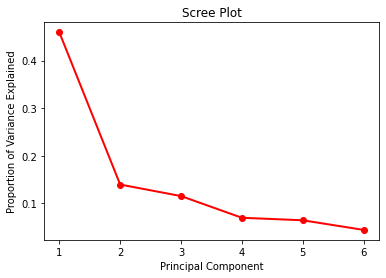

In [85]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

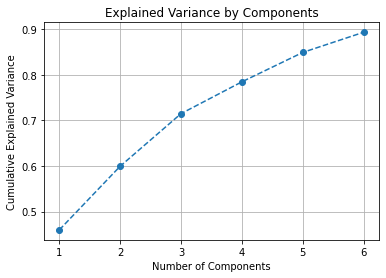

In [86]:
# Check the Variance to choose the number of needed components
plt.plot(PC_values,pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

In [87]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)



Proportion of Variance Explained :  [0.45969927 0.13962667 0.1153589  0.06975017 0.06448417 0.0442304 ]
Cumulative Prop. Variance Explained:  [0.45969927 0.59932593 0.71468483 0.784435   0.84891917 0.89314957]


In [88]:
print(pca.explained_variance_) 

[7.35808063 2.23490515 1.84646814 1.11644152 1.03215245 0.70796467]


In [89]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=features_df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
gdp_g,0.085868,-0.268934,-0.636934,0.076347,-0.001612,0.004483
gdp_pc_g,-0.002095,-0.301813,-0.642554,0.065463,-0.056587,-0.028819
Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,-0.273443,-0.107107,0.073261,0.320931,-0.010423,-0.105635
Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,-0.158289,-0.107270,0.130047,0.668385,-0.040976,-0.510119
pol_gen,-0.335693,-0.126574,0.044424,0.204322,-0.079543,0.123739
exl_gen,0.333597,-0.103087,0.101724,-0.012511,-0.049497,0.078662
exl_eco,0.299318,-0.279058,0.167584,0.118471,-0.092118,0.129336
exl_geo,0.281003,-0.297952,0.169719,0.141279,-0.155723,0.183763
exl_pol,0.292279,-0.211068,0.105908,0.196968,-0.037981,0.095605
exl_soc,0.328544,-0.158110,0.112174,0.177558,-0.014498,0.066974


In [ ]:
#Z=pca2.transform(scaled_df)

In [ ]:
Z.shape

(2287, 5)

manually PCA

In [ ]:
def standardize_data(arr):
         
    '''
    This function standardize an array, its substracts mean value, 
    and then divide the standard deviation.
    
    param 1: array 
    return: standardized array
    '''    
    rows, columns = arr.shape
    
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    
    for column in range(columns):
        
        mean = np.mean(X[:,column])
        std = np.std(X[:,column])
        tempArray = np.empty(0)
        
        for element in X[:,column]:
            
            tempArray = np.append(tempArray, ((element - mean) / std))
 
        standardizedArray[:,column] = tempArray
    
    return standardizedArray

In [ ]:
arr = features_df.to_numpy()

In [ ]:
arr.shape

(2287, 25)

In [ ]:
X=arr.copy()
X = standardize_data(X)

In [ ]:
# Calculating the covariance matrix
covariance_matrix = np.cov(X.T)

In [ ]:
# Using np.linalg.eig function
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[-5.47968560e-02  1.60310435e-01  1.23103170e-01 -4.08126969e-01
   1.26256164e-01 -1.34052846e-01  6.26799148e-01 -1.43823175e-01
   5.18734244e-01 -6.88949843e-02  1.73600525e-01  3.26405134e-02
   1.13951599e-01 -5.61159250e-02 -1.11043445e-01  5.51784532e-02
   4.43318507e-02  3.31830512e-02 -8.09464619e-03  2.41098189e-02
  -1.35537314e-02 -3.03386615e-02  2.21145840e-02  1.59001153e-02
   2.54110629e-06]
 [-1.49931897e-01  3.33510995e-01 -1.10265471e-01 -1.65674468e-01
  -2.41154057e-01 -7.99425000e-02  5.08009335e-02 -2.64707763e-01
  -1.74782793e-01 -2.39936434e-02 -3.99008369e-01  4.25894186e-01
  -1.67757802e-02 -4.82394906e-02  3.82425789e-01  1.68998478e-01
   7.84758315e-02  3.19522789e-01  8.90545360e-02 -1.12916148e-02
  -2.68535276e-02  4.11408792e-02 -1.21842137e-01  8.23404401e-02
  -6.56088743e-05]
 [-2.30250366e-01 -1.03443581e-01 -6.25661911e-03 -1.73721498e-01
  -2.65911395e-02 -2.03309564e-01 -6.91116212e-02 -1.27318429e-01
   9.27030000e-02  2.07

In [ ]:
# Calculating the explained variance on each of components
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

[45.00790010636469, 11.228965154521276, 5.909405806753395, 5.478381642103278, 4.529591272834256, 3.9185176492249085, 3.7498815798862175, 3.237100331438526, 2.8995754776236833, 2.25037507787451, 1.8701373341475809, 1.8066293624375358, 1.4107710157578413, 1.339298184260827, 1.0989333862298136, 1.0038284665915735, 0.8340075922730175, 0.6680700752645824, 0.5151191767823814, 0.37339014097891976, 0.13376208028613906, 0.19857454227458493, 0.28472844886235327, 0.25303395093737885, 2.2144290768346673e-05]


#FA

In [130]:
#Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_df)
chi_square_value, p_value
#The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix. (67892.67658974323, 0.0)

(67892.67658970803, 0.0)

In [140]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_df)
kmo_model
#Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. 0.8224475718892983


/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.8224475718892358

In [141]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(scaled_df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([7.35518831e+00, 2.23402665e+00, 1.84574233e+00, 1.11600267e+00,
       1.03174673e+00, 7.07686378e-01, 3.89075907e-01, 3.49837603e-01,
       2.98765025e-01, 2.44897931e-01, 1.53106945e-01, 1.17980245e-01,
       6.34835446e-02, 5.01000885e-02, 4.23556420e-02, 4.00356794e-06])

Standard practice is to choose factors that: 

*    (i) have associated eigenvalues larger than one; 
*   (ii) contribute individually to the explanation of overall variance by more than 10%; and 


*   (iii) contribute
cumulatively to the explanation of the overall variance by more than 60%. 
Source: https://www.oecd.org/sdd/42495745.pdf

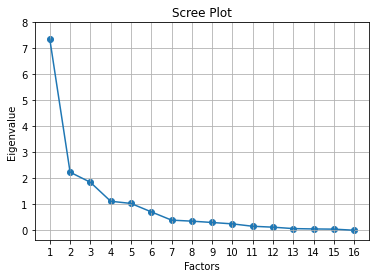

In [230]:
# Create scree plot using matplotlib
plt.scatter(range(1,scaled_df.shape[1]+1),ev)
plt.plot(range(1,scaled_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.yticks(np.arange(min(ev), max(ev)+1, 1.0))
plt.xticks(np.arange(1, scaled_df.shape[1]+1, 1.0))
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [232]:
df_variance=pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])

In [235]:
df_variance

,0,1,2,3,4,5
Variance,7.190159,2.179097,1.788924,0.992386,0.552096,0.192293
Proportional Var,0.449385,0.136194,0.111808,0.062024,0.034506,0.012018
Cumulative Var,0.449385,0.585579,0.697386,0.759410,0.793916,0.805935


In [265]:
facs = ['Factors' + ' ' + str(i + 1) for i in range(6)]
fa = FactorAnalyzer(n_factors=6,rotation=None)
fa.fit(scaled_df)
load=pd.DataFrame(fa.loadings_,index=features_df.columns,columns=facs)

In [314]:
facs = ['Factors' + ' ' + str(i + 1) for i in range(6)]
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(scaled_df)
load=pd.DataFrame(fa.loadings_,index=features_df.columns,columns=facs)

In [315]:
load

,Factors 1,Factors 2,Factors 3,Factors 4,Factors 5,Factors 6
gdp_g,-0.126267,-0.105933,-0.024369,0.931108,-0.051213,-0.030780
gdp_pc_g,0.023434,0.058515,0.065790,0.993309,-0.001743,-0.005880
Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,0.356806,0.547797,0.190677,-0.040859,0.352976,-0.071225
Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,0.094916,0.262424,0.063243,-0.044762,0.879306,-0.078765
pol_gen,0.429704,0.815248,0.217086,-0.014425,0.302723,0.020199
exl_gen,0.764270,0.470652,0.108896,-0.000805,0.175662,-0.054538
exl_eco,0.924697,0.220874,-0.020792,-0.030651,0.068196,-0.008343
exl_geo,0.936376,0.167122,-0.028860,-0.044473,0.016311,-0.213310
exl_pol,0.792748,0.275005,0.071303,-0.064453,0.029471,0.117981
exl_soc,0.874908,0.329304,0.145125,-0.028438,0.071717,0.218490




*  (i) have associated eigenvalues larger than one **Factor 1-3 have eigenvalue higher than one(from screeplot)**
*  (ii) contribute individually to the explanation of overall variance by more than 10%; **Factor 4 explains less than 10% so it can be discarded**
*  (iii) contribute cumulatively to the explanation of the overall variance by more than 60% **Factor 1-3 together explain 69.7% of the variance**






In [260]:
load

,Factors 1,Factors 2,Factors 3,Factors 4,Factors 5,Factors 6
gdp_g,-0.232136,0.398912,0.825547,0.058992,0.015707,0.004419
gdp_pc_g,0.005750,0.466431,0.878916,0.068795,-0.002901,0.013301
Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,0.708271,0.126244,-0.075981,0.250582,0.045103,-0.083063
Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,0.425484,0.137682,-0.155404,0.666733,0.426481,0.112692
pol_gen,0.918508,0.181575,-0.058415,0.277634,-0.156942,-0.083112
exl_gen,0.897031,-0.142790,0.129965,0.003142,0.061514,-0.074662
exl_eco,0.811880,-0.396292,0.221160,-0.162829,0.135152,0.007308
exl_geo,0.767092,-0.430726,0.228775,-0.213499,0.222683,-0.178451
exl_pol,0.772767,-0.273014,0.123572,-0.178892,0.019103,0.093598
exl_soc,0.895574,-0.224705,0.147811,-0.191073,0.009718,0.194061


In [316]:
load=load[['Factors 1', 'Factors 2', 'Factors 3']]

In [317]:
#calculate the variance explained for each factor
load.sum(axis=0).to_dict()

{'Factors 1': 6.344332962918301,
 'Factors 2': 5.582519900807735,
 'Factors 3': 3.302643039920237}

In [318]:
#calculate total variance explained 
load.sum(axis=0).to_frame().sum() 

0    15.229496
dtype: float64

In [319]:
#append row to the dataframe
new_row={'Factors 1': 6.344332962918301,
 'Factors 2': 5.582519900807735,
 'Factors 3': 3.302643039920237}

load = load.append(new_row, ignore_index=True)
load

,Factors 1,Factors 2,Factors 3
0,-0.126267,-0.105933,-0.024369
1,0.023434,0.058515,0.065790
2,0.356806,0.547797,0.190677
3,0.094916,0.262424,0.063243
4,0.429704,0.815248,0.217086
5,0.764270,0.470652,0.108896
6,0.924697,0.220874,-0.020792
7,0.936376,0.167122,-0.028860
8,0.792748,0.275005,0.071303
9,0.874908,0.329304,0.145125


In [320]:
#calculate the proportion of the explained variance by each factor
#variance explained by each factor divided by total variance explained
new_row={'Factors 1': 6.344332962918301/15.229496,
 'Factors 2': 5.582519900807735/15.229496,
 'Factors 3': 3.302643039920237/15.229496}

#append row to the dataframe
load = load.append(new_row, ignore_index=True)
load

,Factors 1,Factors 2,Factors 3
0,-0.126267,-0.105933,-0.024369
1,0.023434,0.058515,0.065790
2,0.356806,0.547797,0.190677
3,0.094916,0.262424,0.063243
4,0.429704,0.815248,0.217086
5,0.764270,0.470652,0.108896
6,0.924697,0.220874,-0.020792
7,0.936376,0.167122,-0.028860
8,0.792748,0.275005,0.071303
9,0.874908,0.329304,0.145125


In [321]:
cols=['gdp_g', 'gdp_pc_g',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'pol_gen', 'exl_gen', 'exl_eco', 'exl_geo', 'exl_pol', 'exl_soc',
       'labour_share', 'suffrage_f', 'domestic_movement', 'slave', 'suffrage',
       'v2xeg_eqaccess','var_explained','prop_var_explained']
load['cols']=cols
load.set_index('cols',inplace=True)

In [322]:
load

,Factors 1,Factors 2,Factors 3
cols,,,
gdp_g,-0.126267,-0.105933,-0.024369
gdp_pc_g,0.023434,0.058515,0.065790
Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,0.356806,0.547797,0.190677
Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,0.094916,0.262424,0.063243
pol_gen,0.429704,0.815248,0.217086
exl_gen,0.764270,0.470652,0.108896
exl_eco,0.924697,0.220874,-0.020792
exl_geo,0.936376,0.167122,-0.028860
exl_pol,0.792748,0.275005,0.071303


 Varimax normalised, extraction:
Principal Components. 
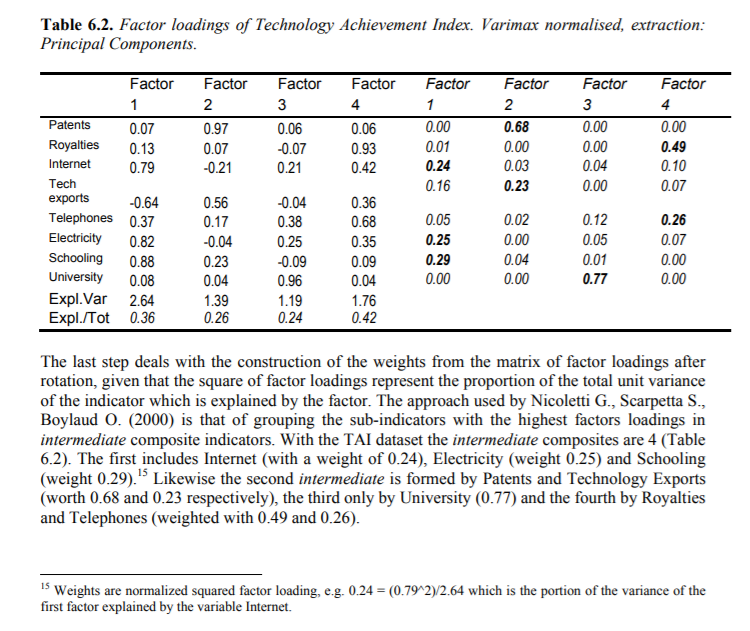

In [323]:
#compute the weights using the method stated in the footnote
vari_max=load.copy()
var_explained=vari_max[16:17]
vari_max=vari_max[:16]
vari_max['Factors 1']=vari_max['Factors 1']**2/var_explained['Factors 1'][0]
vari_max['Factors 2']=vari_max['Factors 2']**2/var_explained['Factors 2'][0]
vari_max['Factors 3']=vari_max['Factors 3']**2/var_explained['Factors 3'][0]

In [324]:
vari_max

,Factors 1,Factors 2,Factors 3
cols,,,
gdp_g,0.002513,0.002010,0.000180
gdp_pc_g,0.000087,0.000613,0.001311
Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,0.020067,0.053754,0.011009
Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,0.001420,0.012336,0.001211
pol_gen,0.029104,0.119055,0.014269
exl_gen,0.092068,0.039680,0.003591
exl_eco,0.134776,0.008739,0.000131
exl_geo,0.138202,0.005003,0.000252
exl_pol,0.099057,0.013547,0.001539


Following the approach in the paper, the highest factor loading for each indicator is selected as the weighting in each intermediate. For example, the third intermediate is formed by gdp growth and gdp per capita growth 


In [325]:
vari_max.style.highlight_max(color = 'lightgreen', axis = 1)

,Factors 1,Factors 2,Factors 3
cols,,,
gdp_g,0.002513,0.002010,0.000180
gdp_pc_g,0.000087,0.000613,0.001311
Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,0.020067,0.053754,0.011009
Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,0.001420,0.012336,0.001211
pol_gen,0.029104,0.119055,0.014269
exl_gen,0.092068,0.039680,0.003591
exl_eco,0.134776,0.008739,0.000131
exl_geo,0.138202,0.005003,0.000252
exl_pol,0.099057,0.013547,0.001539


In [326]:
scaled_df.rename(columns={0:'gdp_g', 1:'gdp_pc_g',
       2:'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       3:'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       4:'pol_gen', 5:'exl_gen', 6:'exl_eco', 7:'exl_geo',8: 'exl_pol',9: 'exl_soc',
       10:'labour_share', 11:'suffrage_f', 12:'domestic_movement', 13:'slave', 14:'suffrage',
       15:'v2xeg_eqaccess'},inplace=True)

In [327]:
scaled_df

,gdp_g,gdp_pc_g,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,suffrage_f,domestic_movement,slave,suffrage,v2xeg_eqaccess
0,-0.218264,-0.668485,-0.487855,-0.292554,-1.741134,-1.482757,-1.859317,-2.312332,-1.693680,-2.158850,-4.520442,0.223916,-3.597221,-1.036018,0.223920,-1.624841
1,0.742537,1.299324,0.505510,-1.198619,-0.470131,0.142318,0.237969,0.813269,-0.068167,0.440036,1.010963,0.223916,0.294096,-0.444866,0.223920,0.142130
2,1.705126,0.620784,-2.510063,-1.652942,-3.213484,-1.251252,-0.190129,0.037834,-1.039694,-1.607449,0.929592,-4.693894,-2.735613,-2.970698,-4.696914,-2.250934
3,-1.166290,-1.068674,-0.345946,0.676126,0.630985,1.013866,0.379359,0.705901,1.115056,0.975220,0.132005,0.223916,0.879765,0.495603,0.223920,0.986196
4,0.483546,1.034408,-0.700719,-1.384163,-0.413502,-0.166356,-0.296171,0.276429,0.026340,1.076580,0.483154,0.223916,0.829082,0.586963,0.223920,-0.664833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,0.773553,0.896522,0.434555,0.699145,0.096157,-0.002941,0.127999,-0.518889,-0.741054,0.156226,-0.299712,0.223916,0.012525,-0.654456,0.223920,-0.015552
2540,-0.256345,-0.507806,-0.736196,-1.652942,-0.765860,-0.397861,0.124071,-0.435380,0.903361,0.780607,0.952638,0.223916,-0.139524,0.549344,0.223920,1.190256
2541,-0.777557,-0.745708,0.966715,2.109962,0.643569,-0.406940,-0.378649,-0.614327,-0.068167,-0.662768,-0.089027,0.223916,0.598193,-0.203031,0.223920,0.452858
2542,0.023392,-0.340789,0.434555,-0.071653,0.033236,-0.229906,-0.382576,-0.705789,-1.962079,-0.857380,-0.485705,0.223916,-0.308467,0.355876,0.223920,0.137493


Aggregting the intermediate composites

In [328]:
load[17:18]

,Factors 1,Factors 2,Factors 3
cols,,,
prop_var_explained,0.416582,0.36656,0.216858


In [332]:
#first intermediate	
scaled_df['first']= 0.002513*scaled_df['gdp_g']  + 0.092068 *scaled_df['exl_gen'] + 0.134776	*scaled_df['exl_eco'] + 0.138202*scaled_df['exl_geo'] + 0.099057 *scaled_df['exl_pol']+ 0.120653*scaled_df['exl_soc']
#second intermediate
scaled_df['second']=0.0537548*scaled_df['Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX'] + 0.012336	*scaled_df['Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS']+ 0.000170*scaled_df['labour_share']+ 0.097847 *scaled_df['domestic_movement']+ 0.086165*scaled_df['slave']+ 		0.059264	*scaled_df['v2xeg_eqaccess']                      	
#third intermediate
scaled_df['third']= 0.001311*scaled_df['gdp_pc_g'] + 0.280691*scaled_df['suffrage_f']+ 0.280711*scaled_df['suffrage']
#perform aggregation using the prop of variance explained by each factor
scaled_df['index']= scaled_df['first']* 0.416582 + scaled_df['second']*	0.36656 + scaled_df['third']*0.216858

In [333]:
full.reset_index(inplace=True)

In [334]:
check=pd.merge(full, scaled_df['index'], left_index=True, right_index=True)

In [335]:
check

,index_x,Country Name,Country Code,Continent,Year,gdp_g,gdp_pc_g,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,suffrage_f,domestic_movement,slave,suffrage,v2xeg_eqaccess,index_y
0,2,Angola,AGO,Africa,2000,0.030546,-0.002680,0.62500,0.154545,0.484,0.369,0.163,0.069,0.214,0.127,0.372400,1.0,0.138,0.531,1.0,0.303,-0.654202
1,3,Albania,ALB,Europe,2000,0.069500,0.076339,0.80000,0.051613,0.686,0.727,0.697,0.855,0.644,0.768,0.922612,1.0,0.829,0.641,1.0,0.684,0.117542
2,5,United Arab Emirates,ARE,Asia,2000,0.108527,0.049092,0.26875,0.000000,0.250,0.420,0.588,0.660,0.387,0.263,0.914518,0.0,0.291,0.171,0.0,0.168,-1.047583
3,6,Argentina,ARG,South America,2000,-0.007890,-0.018749,0.65000,0.264591,0.861,0.919,0.733,0.828,0.957,0.900,0.835182,1.0,0.933,0.816,1.0,0.866,0.286472
4,7,Armenia,ARM,Asia,2000,0.059000,0.065701,0.58750,0.030534,0.695,0.659,0.561,0.720,0.669,0.925,0.870111,1.0,0.924,0.833,1.0,0.510,0.089961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,4001,Vietnam,VNM,Asia,2018,0.070758,0.060164,0.78750,0.267206,0.776,0.695,0.669,0.520,0.466,0.698,0.792239,1.0,0.779,0.602,1.0,0.650,-0.090649
2535,4002,Vanuatu,VUT,Oceania,2018,0.029002,0.003773,0.58125,0.000000,0.639,0.608,0.668,0.541,0.901,0.852,0.916811,1.0,0.752,0.826,1.0,0.910,-0.251395
2536,4006,South Africa,ZAF,Africa,2018,0.007871,-0.005781,0.88125,0.427481,0.863,0.606,0.540,0.496,0.644,0.496,0.813196,1.0,0.883,0.686,1.0,0.751,0.063562
2537,4007,Zambia,ZMB,Africa,2018,0.040344,0.010479,0.78750,0.179641,0.766,0.645,0.539,0.473,0.143,0.448,0.773738,1.0,0.722,0.790,1.0,0.683,0.395942


In [336]:
scaled_df

,gdp_g,gdp_pc_g,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,suffrage_f,domestic_movement,slave,suffrage,v2xeg_eqaccess,first,second,third,index
0,-0.218264,-0.668485,-0.487855,-0.292554,-1.741134,-1.482757,-1.859317,-2.312332,-1.693680,-2.158850,-4.520442,0.223916,-3.597221,-1.036018,0.223920,-1.624841,-1.135466,-0.568142,0.124832,-0.654202
1,0.742537,1.299324,0.505510,-1.198619,-0.470131,0.142318,0.237969,0.813269,-0.068167,0.440036,1.010963,0.223916,0.294096,-0.444866,0.223920,0.142130,0.205776,0.011427,0.127411,0.117542
2,1.705126,0.620784,-2.510063,-1.652942,-3.213484,-1.251252,-0.190129,0.037834,-1.039694,-1.607449,0.929592,-4.693894,-2.735613,-2.970698,-4.696914,-2.250934,-0.428244,-0.812202,-2.635195,-1.047583
3,-1.166290,-1.068674,-0.345946,0.676126,0.630985,1.013866,0.379359,0.705901,1.115056,0.975220,0.132005,0.223916,0.879765,0.495603,0.223920,0.986196,0.467216,0.176999,0.124307,0.286472
4,0.483546,1.034408,-0.700719,-1.384163,-0.413502,-0.166356,-0.296171,0.276429,0.026340,1.076580,0.483154,0.223916,0.829082,0.586963,0.223920,-0.664833,0.116687,0.037638,0.127064,0.089961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,0.773553,0.896522,0.434555,0.699145,0.096157,-0.002941,0.127999,-0.518889,-0.741054,0.156226,-0.299712,0.223916,0.012525,-0.654456,0.223920,-0.015552,-0.107344,-0.024154,0.126883,-0.026056
2540,-0.256345,-0.507806,-0.736196,-1.652942,-0.765860,-0.397861,0.124071,-0.435380,0.903361,0.780607,0.952638,0.223916,-0.139524,0.549344,0.223920,1.190256,0.102944,0.044419,0.125042,0.086283
2541,-0.777557,-0.745708,0.966715,2.109962,0.643569,-0.406940,-0.378649,-0.614327,-0.068167,-0.662768,-0.089027,0.223916,0.598193,-0.203031,0.223920,0.452858,-0.262071,0.145854,0.124730,-0.028661
2542,0.023392,-0.340789,0.434555,-0.071653,0.033236,-0.229906,-0.382576,-0.705789,-1.962079,-0.857380,-0.485705,0.223916,-0.308467,0.355876,0.223920,0.137493,-0.468015,0.031023,0.125261,-0.156431


In [337]:
# Assign ranking
check['Rank'] = check['index_y'].rank(ascending = False)
check = check.sort_values(by = 'Rank').reset_index()


In [338]:
check.describe()

,index,index_x,Year,gdp_g,gdp_pc_g,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,suffrage_f,domestic_movement,slave,suffrage,v2xeg_eqaccess,index_y,Rank
count,2539.00000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000
mean,1269.00000,2054.952343,2009.256794,0.039477,0.024255,0.710895,0.187484,0.760730,0.696175,0.637113,0.651355,0.662291,0.659719,0.821713,0.954379,0.776838,0.723612,0.954406,0.653346,0.000113,1270.000000
std,733.09049,1140.695447,5.395346,0.040529,0.040128,0.176293,0.113523,0.159116,0.220236,0.254421,0.251004,0.264780,0.246869,0.098991,0.203573,0.177774,0.186249,0.203448,0.215877,0.351381,733.090489
min,0.00000,2.000000,2000.000000,-0.301451,-0.313331,0.237500,0.000000,0.105000,0.060000,0.042000,0.052000,0.067000,0.066000,0.112994,0.000000,0.042000,0.026000,0.000000,0.070000,-1.233402,1.000000
25%,634.50000,1089.500000,2005.000000,0.019553,0.005768,0.618750,0.101075,0.675000,0.556000,0.439000,0.485000,0.456000,0.483500,0.785624,1.000000,0.725000,0.644000,1.000000,0.510000,-0.203810,635.500000
50%,1269.00000,2063.000000,2009.000000,0.039130,0.024141,0.731250,0.171429,0.798000,0.712000,0.663000,0.688000,0.702000,0.694000,0.830624,1.000000,0.836000,0.755000,1.000000,0.693000,0.013364,1270.000000
75%,1903.50000,3043.500000,2014.000000,0.060137,0.043835,0.843750,0.257606,0.881500,0.909000,0.864000,0.901000,0.916000,0.882000,0.873296,1.000000,0.901000,0.861000,1.000000,0.830000,0.298243,1904.500000
max,2538.00000,4008.000000,2018.000000,0.344662,0.329971,1.000000,0.637500,0.969000,0.987000,0.991000,0.969000,0.992000,0.989000,1.326813,1.000000,0.958000,0.975000,1.000000,0.976000,0.483322,2539.000000


In [339]:
check.index_y=round((check.index_y +1.233402),2)

In [340]:
check.describe()

,index,index_x,Year,gdp_g,gdp_pc_g,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,suffrage_f,domestic_movement,slave,suffrage,v2xeg_eqaccess,index_y,Rank
count,2539.00000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000
mean,1269.00000,2054.952343,2009.256794,0.039477,0.024255,0.710895,0.187484,0.760730,0.696175,0.637113,0.651355,0.662291,0.659719,0.821713,0.954379,0.776838,0.723612,0.954406,0.653346,1.233430,1270.000000
std,733.09049,1140.695447,5.395346,0.040529,0.040128,0.176293,0.113523,0.159116,0.220236,0.254421,0.251004,0.264780,0.246869,0.098991,0.203573,0.177774,0.186249,0.203448,0.215877,0.351475,733.090489
min,0.00000,2.000000,2000.000000,-0.301451,-0.313331,0.237500,0.000000,0.105000,0.060000,0.042000,0.052000,0.067000,0.066000,0.112994,0.000000,0.042000,0.026000,0.000000,0.070000,0.000000,1.000000
25%,634.50000,1089.500000,2005.000000,0.019553,0.005768,0.618750,0.101075,0.675000,0.556000,0.439000,0.485000,0.456000,0.483500,0.785624,1.000000,0.725000,0.644000,1.000000,0.510000,1.030000,635.500000
50%,1269.00000,2063.000000,2009.000000,0.039130,0.024141,0.731250,0.171429,0.798000,0.712000,0.663000,0.688000,0.702000,0.694000,0.830624,1.000000,0.836000,0.755000,1.000000,0.693000,1.250000,1270.000000
75%,1903.50000,3043.500000,2014.000000,0.060137,0.043835,0.843750,0.257606,0.881500,0.909000,0.864000,0.901000,0.916000,0.882000,0.873296,1.000000,0.901000,0.861000,1.000000,0.830000,1.530000,1904.500000
max,2538.00000,4008.000000,2018.000000,0.344662,0.329971,1.000000,0.637500,0.969000,0.987000,0.991000,0.969000,0.992000,0.989000,1.326813,1.000000,0.958000,0.975000,1.000000,0.976000,1.720000,2539.000000


In [341]:
final_index=check[['Country Name', 'Country Code', 'Continent', 'Year',
       'gdp_g', 'gdp_pc_g',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'pol_gen', 'exl_gen', 'exl_eco', 'exl_geo', 'exl_pol', 'exl_soc',
       'labour_share', 'suffrage_f', 'domestic_movement', 'slave', 'suffrage',
       'v2xeg_eqaccess', 'index_y', 'Rank']].rename(columns={'index_y':'Composite_index'})

In [342]:
final_index.head(20)

,Country Name,Country Code,Continent,Year,gdp_g,gdp_pc_g,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,suffrage_f,domestic_movement,slave,suffrage,v2xeg_eqaccess,Composite_index,Rank
0,Algeria,DZA,Africa,2016,0.032000,0.011046,0.57500,0.316017,0.813,0.638,0.626,0.556,0.588,0.647,0.831211,1.0,0.798,0.702,1.0,0.580,1.72,1.0
1,Dominican Republic,DOM,North America,2015,0.069270,0.057155,0.83750,0.207650,0.827,0.369,0.223,0.258,0.313,0.362,0.911553,1.0,0.814,0.745,1.0,0.581,1.72,2.0
2,Spain,ESP,Europe,2018,0.022888,0.018418,0.97500,0.391429,0.942,0.957,0.934,0.900,0.975,0.953,0.849366,1.0,0.948,0.906,1.0,0.900,1.72,3.0
3,Ecuador,ECU,South America,2017,0.023684,0.005739,0.89375,0.379562,0.865,0.724,0.608,0.704,0.786,0.745,0.789443,1.0,0.857,0.828,1.0,0.768,1.71,4.0
4,Nepal,NPL,Asia,2009,0.045331,0.036895,0.49375,0.331650,0.777,0.678,0.788,0.493,0.610,0.641,0.959903,1.0,0.761,0.759,1.0,0.861,1.71,5.0
5,Nepal,NPL,Asia,2004,0.046826,0.032888,0.46875,0.058537,0.556,0.464,0.659,0.274,0.171,0.386,0.952699,0.0,0.530,0.576,0.0,0.731,1.71,6.0
6,Nepal,NPL,Asia,2005,0.034792,0.021722,0.46875,0.058537,0.571,0.464,0.689,0.279,0.181,0.386,0.955593,0.0,0.542,0.576,0.0,0.731,1.71,7.0
7,Nepal,NPL,Asia,2006,0.033646,0.020870,0.46875,0.058824,0.614,0.467,0.688,0.317,0.298,0.431,0.955852,0.0,0.599,0.587,0.0,0.777,1.71,8.0
8,Pakistan,PAK,Asia,2018,0.058364,0.036810,0.52500,0.202346,0.603,0.747,0.488,0.675,0.769,0.699,0.923136,1.0,0.428,0.594,1.0,0.363,1.71,9.0
9,Eswatini,SWZ,Africa,2012,0.053913,0.046828,0.43750,0.136364,0.467,0.585,0.512,0.566,0.221,0.578,0.782846,1.0,0.390,0.115,1.0,0.201,1.71,10.0


In [344]:
final_index.shape

(2539, 22)

In [343]:
final_index.tail(20)

,Country Name,Country Code,Continent,Year,gdp_g,gdp_pc_g,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,suffrage_f,domestic_movement,slave,suffrage,v2xeg_eqaccess,Composite_index,Rank
2519,Senegal,SEN,Africa,2009,0.027521,-8.200000e-07,0.63750,0.226667,0.816,0.665,0.724,0.769,0.754,0.780,0.891485,1.0,0.891,0.694,1.0,0.790,0.18,2520.0
2520,Liberia,LBR,Africa,2002,0.037630,1.334264e-02,0.66250,0.078125,0.525,0.442,0.284,0.151,0.292,0.308,0.666904,0.0,0.536,0.339,0.0,0.661,0.17,2521.0
2521,Senegal,SEN,Africa,2006,0.023308,-2.957549e-03,0.63750,0.191667,0.810,0.665,0.724,0.769,0.754,0.780,0.895664,1.0,0.891,0.694,1.0,0.790,0.17,2522.0
2522,Senegal,SEN,Africa,2007,0.028271,1.453263e-03,0.63750,0.220000,0.816,0.665,0.724,0.769,0.754,0.780,0.908263,1.0,0.891,0.694,1.0,0.790,0.17,2523.0
2523,Liberia,LBR,Africa,2003,-0.301451,-3.133308e-01,0.66250,0.078125,0.525,0.442,0.284,0.151,0.292,0.308,0.573178,0.0,0.536,0.339,0.0,0.661,0.16,2524.0
2524,Senegal,SEN,Africa,2005,0.043102,1.676298e-02,0.63750,0.191667,0.810,0.665,0.724,0.772,0.754,0.780,0.884161,1.0,0.891,0.694,1.0,0.790,0.16,2525.0
2525,Senegal,SEN,Africa,2004,0.046433,2.043050e-02,0.63750,0.191667,0.802,0.665,0.724,0.772,0.754,0.780,0.890836,1.0,0.891,0.694,1.0,0.790,0.10,2526.0
2526,Saudi Arabia,SAU,Asia,2003,0.112421,8.015644e-02,0.23750,0.000000,0.105,0.060,0.436,0.474,0.861,0.302,0.795406,0.0,0.160,0.209,0.0,0.098,0.10,2527.0
2527,Eritrea,ERI,Africa,2000,-0.031420,-5.465864e-02,0.66250,0.146667,0.381,0.280,0.485,0.374,0.097,0.233,0.873209,0.0,0.145,0.105,0.0,0.492,0.06,2528.0
2528,Eritrea,ERI,Africa,2001,0.087554,4.985964e-02,0.66250,0.146667,0.334,0.280,0.485,0.420,0.079,0.233,0.871141,0.0,0.042,0.073,0.0,0.492,0.04,2529.0


uk

In [226]:
uk=check[check['Country Code']=='GBR'].sort_values('Year')

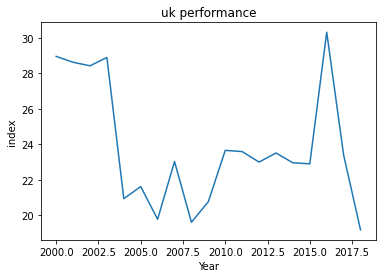

In [227]:

plt.plot(uk.Year,uk.index_y)
plt.title('uk performance')
plt.xlabel('Year')
plt.ylabel('index')
plt.show()